<h2>Visualizador De Series Temporales De Vistas De Página</h2>

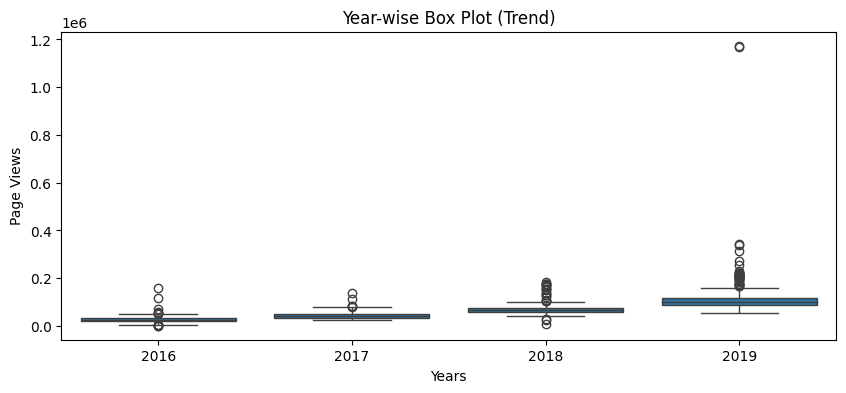

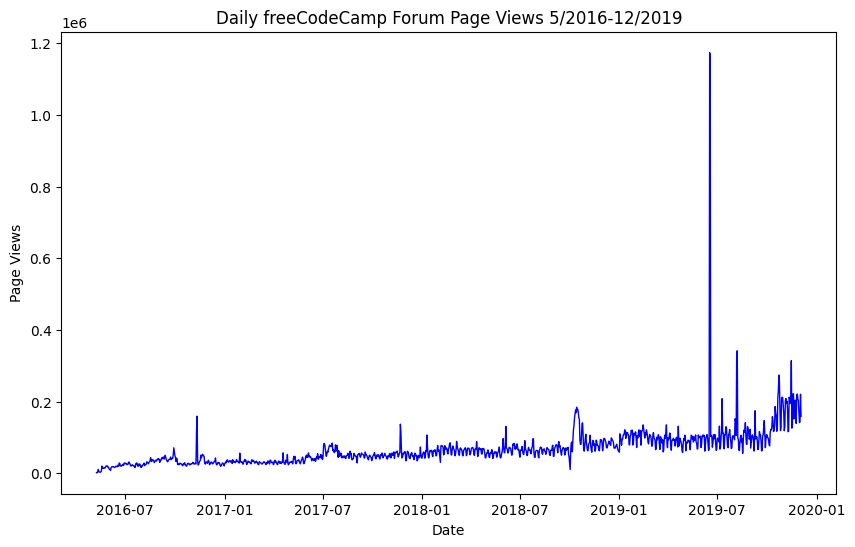

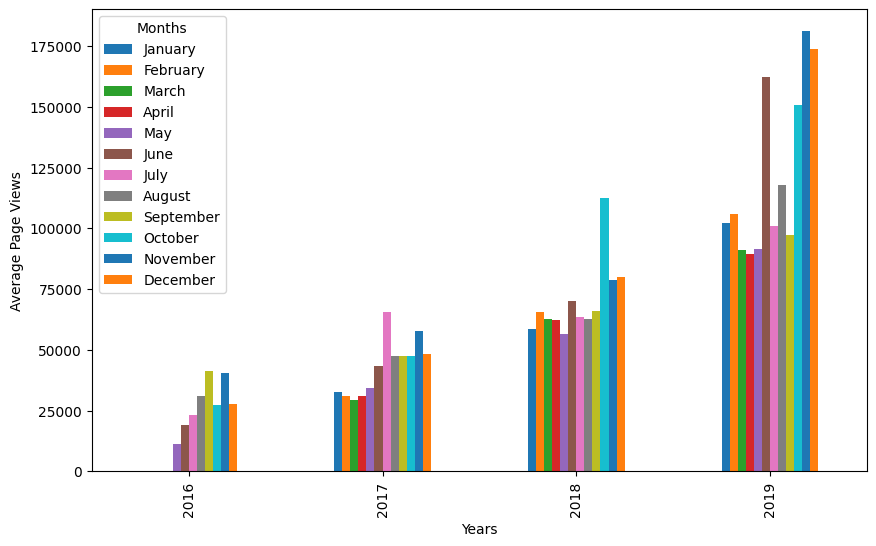

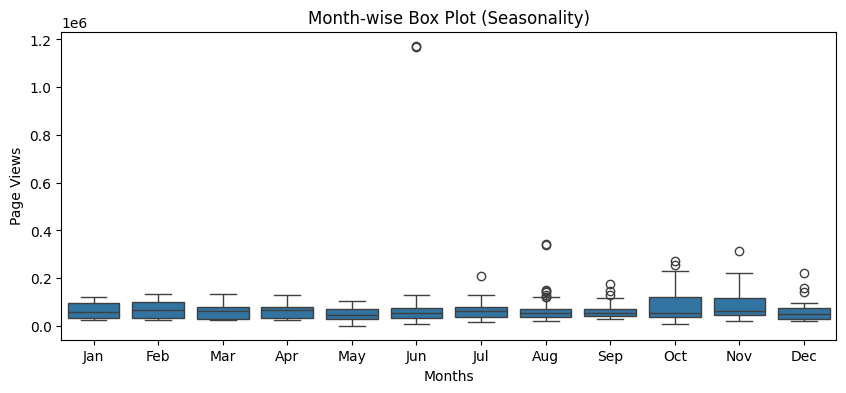

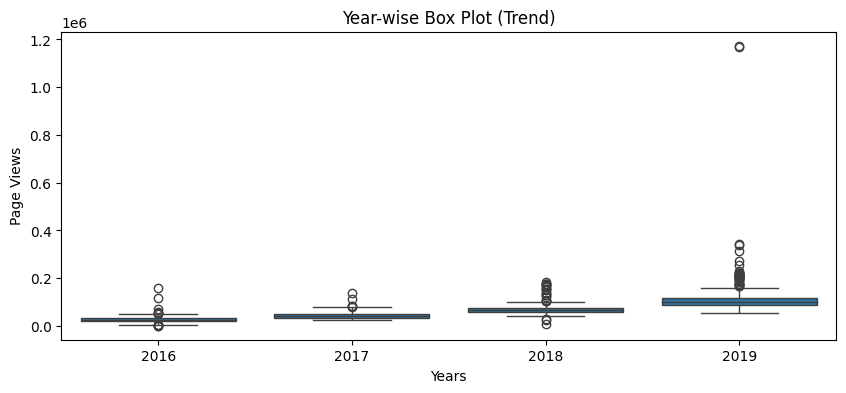

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('ExcelFiles/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

# Clean data
df = df[(df['value'] <= df['value'].quantile(0.025)) | (df['value'] >= df['value'].quantile(0.025))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df.index, df['value'], color='blue', linewidth=1)

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
    
draw_line_plot()

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df['year'] = df.index.year
    df['months'] = df.index.month
    df_bar = pd.pivot_table(df, index='year', columns='months', values='value', aggfunc='mean')

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(10,6))
    df_bar.plot(kind='bar', ax=ax)

    month = ['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December']

    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(month, title='Months')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    month_3l = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x='month', y='value', data=df_box, order=month_3l, ax=ax,  patch_artist=True)
    ax.set_title('Month-wise Box Plot (Seasonality)')
    ax.set_xlabel('Months')
    ax.set_ylabel('Page Views')

    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x='year', y='value', data=df_box, ax=ax,  patch_artist=True)
    ax.set_title('Year-wise Box Plot (Trend)')
    ax.set_xlabel('Years')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()

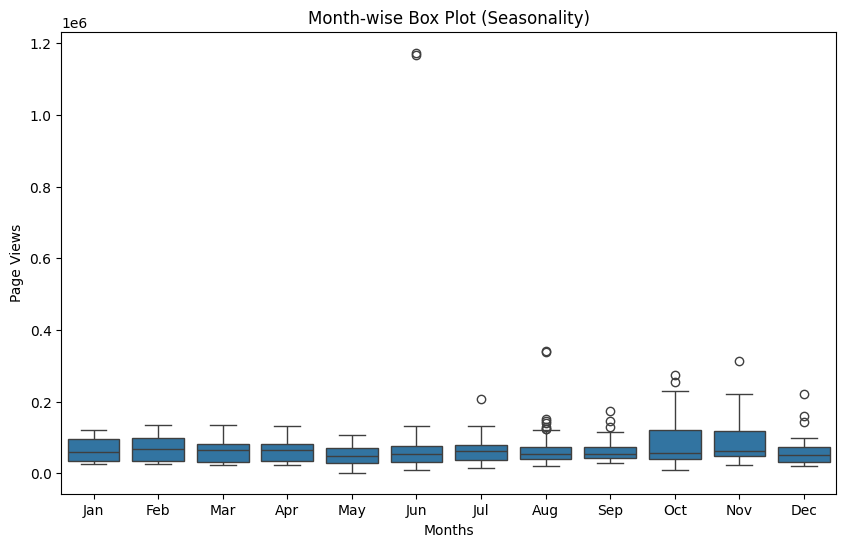

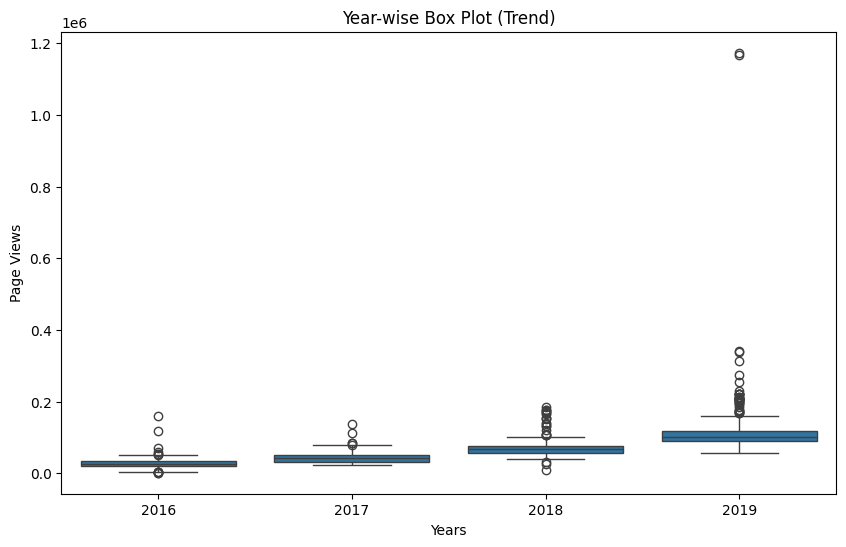

In [2]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
month_3l = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='month', y='value', order=month_3l, ax=ax, data=df_box, patch_artist=True)
ax.set_title('Month-wise Box Plot (Seasonality)')
ax.set_xlabel('Months')
ax.set_ylabel('Page Views')

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='year', y='value', ax=ax, data=df_box, patch_artist=True)
ax.set_title('Year-wise Box Plot (Trend)')
ax.set_xlabel('Years')
ax.set_ylabel('Page Views')

plt.show()

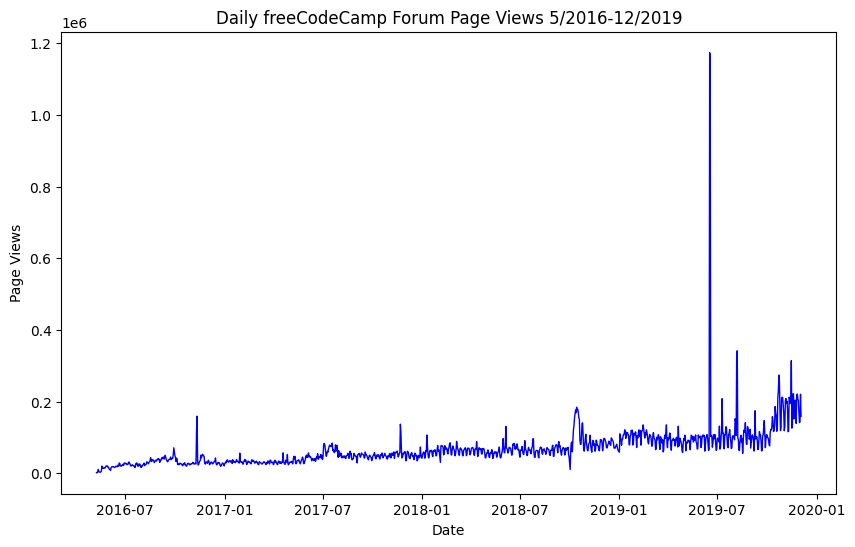

In [3]:
#Limpie los datos filtrando los días en los que las visitas a la 
#página estuvieron en el 2,5 % superior o en el 2,5 % inferior del conjunto de datos.
df = pd.read_csv('ExcelFiles/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df = df[(df['value'] <= df['value'].quantile(0.025)) | (df['value'] >= df['value'].quantile(0.025))]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.index, df['value'], color='blue', linewidth=1)

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
fig.savefig('line_plot.png')
plt.show()

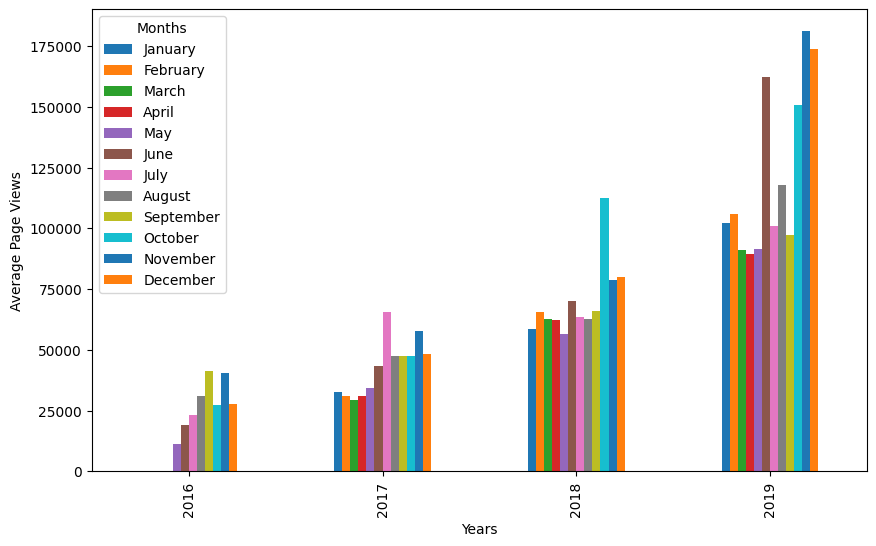

In [6]:
#bar plot
#prom = df.groupby(['year','months'])['value'].mean()
#df_pivot = prom.pivot(index='year', columns='months', values='value')

#Cree una draw_bar_plotfunción que dibuje un gráfico de barras similar
#  a "examples/Figure_2.png". Debe mostrar el promedio de visitas diarias 
# a la página para cada mes agrupadas por año. La leyenda debe mostrar 
# las etiquetas de los meses y tener un título de Months. En el gráfico, 
# la etiqueta en el eje x debe ser Years y la etiqueta en el eje y debe ser Average Page Views.

def promedio_visitas_diarias():
    df = pd.read_csv('ExcelFiles/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
    df['year'] = df.index.year
    df['months'] = df.index.month
    df_pivot = pd.pivot_table(df, index='year', columns='months', values='value', aggfunc='mean')
    fig, ax = plt.subplots(figsize=(10,6))
    df_pivot.plot(kind='bar', ax=ax)

    month = ['January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December']

    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(month, title='Months')
    #fig.savefig('line_plot.png')
    plt.show()
promedio_visitas_diarias()
